#Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет [Mortality and Water Hardness](https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness)

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

#Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

*Построить точечный график

*Рассчитать коэффициенты корреляции Пирсона и Спирмена

*Построить модель линейной регрессии

*Рассчитать коэффициент детерминации

*Вывести график остатков

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv', index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

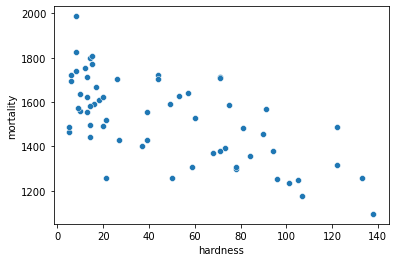

In [3]:
sns.scatterplot(data=df, x='hardness', y='mortality') #hardness mortality

In [4]:
df[['hardness', 'mortality']].corr() #Коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
df[['hardness', 'mortality']].corr(method='spearman') #Коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
X = df[['hardness']]
y = df['mortality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train) #Cтроим модель линейной регрессии

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
model.score(X_test, y_test) #Возвращаем значение коэффициента детерминации

0.23374928387625848

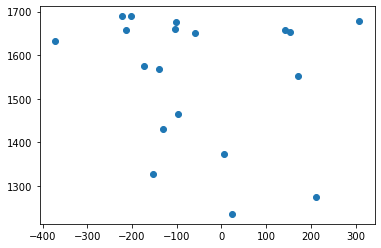

In [11]:
plt.scatter(y_test - y_pred, y_pred) #График остатков

#Задание 2. Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

*Разделить данные на 2 группы

*Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [12]:
south = df[df['location'] == 'South']
north = df[df['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

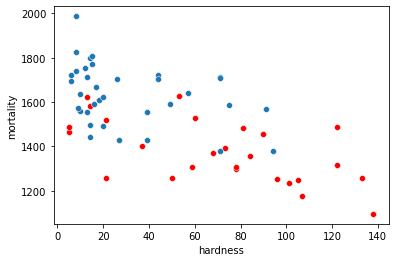

In [13]:
sns.scatterplot(data=south, x='hardness', y='mortality', color='red')
sns.scatterplot(data=north, x='hardness', y='mortality')

In [14]:
south[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [15]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [16]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [17]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [18]:
Xs, Xn = south[['hardness']], north[['hardness']]
ys, yn = south['mortality'], north[['mortality']]

In [19]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=15)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30, random_state=20)

Модель Линейной регрессии ЮГ

In [20]:
model2 = LinearRegression()
model2.fit(Xs_train, ys_train)

LinearRegression()

In [21]:
ys_predict = model2.predict(Xs_test)

In [22]:
model2.score(Xs_test, ys_test)

0.11957071465163671

Модель Линейной регрессии СЕВЕР

In [23]:
model3 = LinearRegression()
model3.fit(Xn_train, yn_train)

LinearRegression()

In [24]:
yn_predict = model3.predict(Xn_test)

In [25]:
model3.score(Xs_test, ys_test)

-1.8692166545302151

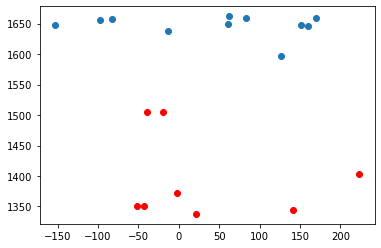

In [26]:
plt.scatter(ys_test - ys_predict, ys_predict, color='red')
plt.scatter(yn_test - yn_predict, yn_predict)

Зависимость Северных и Южных городов отличается.

*Смертность в Южных городах ниже, чем в Северных. 
*Концентрация кальция в Южных городах выше, чем в Северных.